<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n250.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.108413,-52.511532,-1.403118,58.832396,-60.235515
1,0.0,1.0,23.945779,43.900480,77.846258,38.928207,38.918051
2,0.0,2.0,55.341962,-69.640241,-4.298280,75.339608,-79.637887
3,0.0,3.0,99.546930,-3.865601,105.681329,126.605867,-20.924538
4,0.0,4.0,91.396268,5.797963,107.194231,117.153219,-9.958988
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.731579,-21.374950,63.356629,90.924235,-27.567605
29996,999.0,26.0,46.121025,-2.519337,53.601688,51.548631,2.053057
29997,999.0,27.0,21.110773,16.854953,47.965726,17.127986,30.837741
29998,999.0,28.0,60.869950,-93.144955,-22.275005,71.847009,-94.122014


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.108413,-52.511532,-1.403118,58.832396,-60.235515
1,0.0,1.0,23.945779,43.900480,77.846258,38.928207,38.918051
2,0.0,2.0,55.341962,-69.640241,-4.298280,75.339608,-79.637887
3,0.0,3.0,99.546930,-3.865601,105.681329,126.605867,-20.924538
4,0.0,4.0,91.396268,5.797963,107.194231,117.153219,-9.958988
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.731579,-21.374950,63.356629,90.924235,-27.567605
29996,999.0,26.0,46.121025,-2.519337,53.601688,51.548631,2.053057
29997,999.0,27.0,21.110773,16.854953,47.965726,17.127986,30.837741
29998,999.0,28.0,60.869950,-93.144955,-22.275005,71.847009,-94.122014


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    41.108413 -52.511532   -1.403118   58.832396 -60.235515
      1.0    23.945779  43.900480   77.846258   38.928207  38.918051
      2.0    55.341962 -69.640241   -4.298280   75.339608 -79.637887
      3.0    99.546930  -3.865601  105.681329  126.605867 -20.924538
      4.0    91.396268   5.797963  107.194231  117.153219  -9.958988
...                ...        ...         ...         ...        ...
999.0 25.0   74.731579 -21.374950   63.356629   90.924235 -27.567605
      26.0   46.121025  -2.519337   53.601688   51.548631   2.053057
      27.0   21.110773  16.854953   47.965726   17.127986  30.837741
      28.0   60.869950 -93.144955  -22.275005   71.847009 -94.122014
      29.0   24.947335 -28.390984    6.556351   22.408098 -15.851748

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    41.108413 -52.511532   -1.403118   58.832396 -60.235515
      1.0    23.945779  43.900480   77.846258   38.928207  38.918051
      2.0    55.341962 -69.640241   -4.298280   75.339608 -79.637887
      3.0    99.546930  -3.865601  105.681329  126.605867 -20.924538
      4.0    91.396268   5.797963  107.194231  117.153219  -9.958988
...                ...        ...         ...         ...        ...
999.0 25.0   74.731579 -21.374950   63.356629   90.924235 -27.567605
      26.0   46.121025  -2.519337   53.601688   51.548631   2.053057
      27.0   21.110773  16.854953   47.965726   17.127986  30.837741
      28.0   60.869950 -93.144955  -22.275005   71.847009 -94.122014
      29.0   24.947335 -28.390984    6.556351   22.408098 -15.851748

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.108413,-52.511532,-1.403118,58.832396,-60.235515
1,0.0,1.0,23.945779,43.900480,77.846258,38.928207,38.918051
2,0.0,2.0,55.341962,-69.640241,-4.298280,75.339608,-79.637887
3,0.0,3.0,99.546930,-3.865601,105.681329,126.605867,-20.924538
4,0.0,4.0,91.396268,5.797963,107.194231,117.153219,-9.958988
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.731579,-21.374950,63.356629,90.924235,-27.567605
29996,999.0,26.0,46.121025,-2.519337,53.601688,51.548631,2.053057
29997,999.0,27.0,21.110773,16.854953,47.965726,17.127986,30.837741
29998,999.0,28.0,60.869950,-93.144955,-22.275005,71.847009,-94.122014


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    41.108413 -52.511532   -1.403118   58.832396 -60.235515
      1.0    23.945779  43.900480   77.846258   38.928207  38.918051
      2.0    55.341962 -69.640241   -4.298280   75.339608 -79.637887
      3.0    99.546930  -3.865601  105.681329  126.605867 -20.924538
      4.0    91.396268   5.797963  107.194231  117.153219  -9.958988
...                ...        ...         ...         ...        ...
999.0 25.0   74.731579 -21.374950   63.356629   90.924235 -27.567605
      26.0   46.121025  -2.519337   53.601688   51.548631   2.053057
      27.0   21.110773  16.854953   47.965726   17.127986  30.837741
      28.0   60.869950 -93.144955  -22.275005   71.847009 -94.122014
      29.0   24.947335 -28.390984    6.556351   22.408098 -15.851748

[30000 rows x 5 columns]

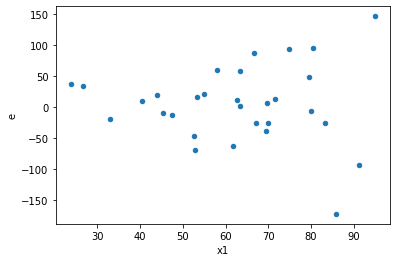

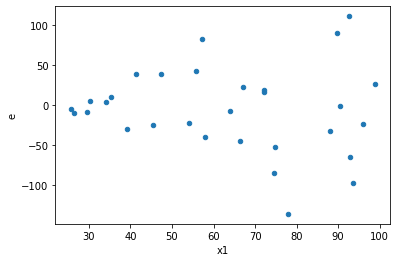

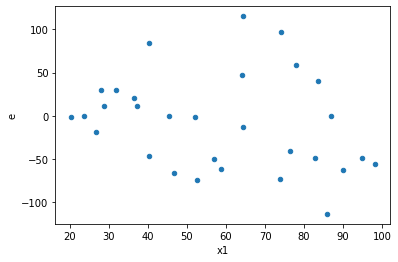

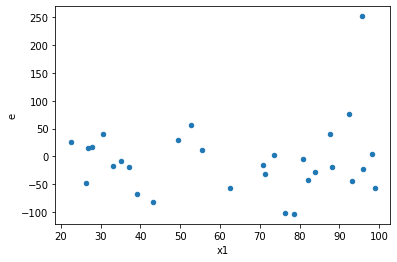

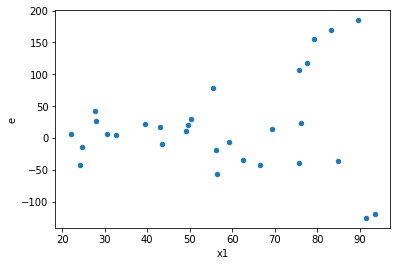

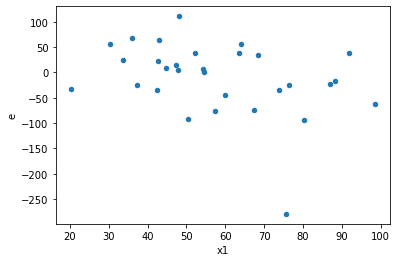

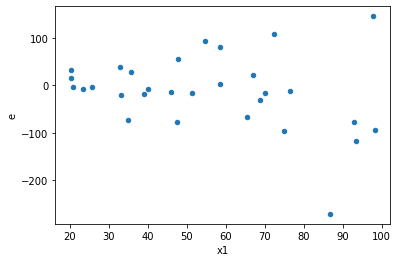

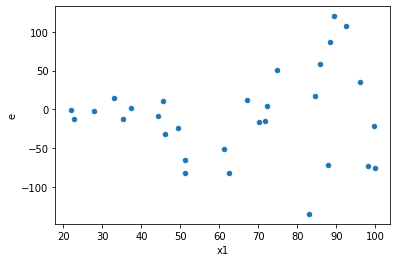

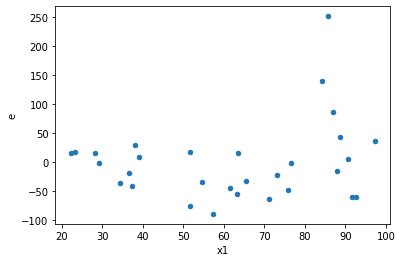

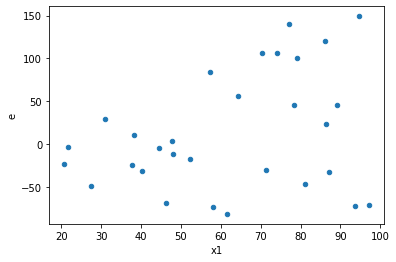

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,11.0,10138.34057798224,27790.11618779209,921.6673252711128,2526.3741988901897,2.7410912046242335,0.10901419713099725,0.9454929014345014,0.054507098565498624,Reject005=1 : Homoscedasticity
1.0,11.0,11.0,20719.479385638544,93745.92022226949,1883.5890350580494,8522.35638384268,4.524530683297397,0.01896602136744563,0.9905169893162772,0.009483010683722815,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,8148.28487198029,46917.58752911374,740.7531701800264,4265.235229919431,5.7579709431184,0.007228251686147491,0.9963858741569263,0.0036141258430737455,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,13809.282018164757,59450.29393627182,1255.3892743786143,5404.572176024711,4.305096663104626,0.022929611938677263,0.9885351940306614,0.011464805969338632,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,11181.154799760972,155857.78216660334,1016.4686181600883,14168.889287873031,13.93932782058748,0.0001288984155707329,0.9999355507922146,6.444920778536645e-05,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,6753.856920694708,31386.787641984934,613.986992790428,2853.3443310895395,4.6472390532603205,0.01710114617305547,0.9914494269134723,0.008550573086527735,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,10016.531729072882,117103.11352926125,910.5937935520801,10645.737593569203,11.69098413469511,0.000301350145213819,0.9998493249273931,0.0001506750726069095,Reject005=0 : Heteroscedasticity
7.0,11.0,11.0,16414.221210582178,125173.56083528543,1492.2019282347435,11379.414621389586,7.625921402508368,0.0021627622703654925,0.9989186188648173,0.0010813811351827463,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,10605.331663451201,45325.21872596147,964.1210603137456,4120.474429632861,4.273814357184532,0.02357036219870645,0.9882148189006468,0.011785181099353226,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,10138.34057798224,27790.11618779209,921.6673252711128,2526.3741988901897,2.7410912046242335,0.10901419713099725,Reject005=1 : Homoscedasticity
1.0,11.0,11.0,20719.479385638544,93745.92022226949,1883.5890350580494,8522.35638384268,4.524530683297397,0.01896602136744563,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,8148.28487198029,46917.58752911374,740.7531701800264,4265.235229919431,5.7579709431184,0.007228251686147491,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,13809.282018164757,59450.29393627182,1255.3892743786143,5404.572176024711,4.305096663104626,0.022929611938677263,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,11181.154799760972,155857.78216660334,1016.4686181600883,14168.889287873031,13.93932782058748,0.0001288984155707329,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,6753.856920694708,31386.787641984934,613.986992790428,2853.3443310895395,4.6472390532603205,0.01710114617305547,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,10016.531729072882,117103.11352926125,910.5937935520801,10645.737593569203,11.69098413469511,0.000301350145213819,Reject005=0 : Heteroscedasticity
7.0,11.0,11.0,16414.221210582178,125173.56083528543,1492.2019282347435,11379.414621389586,7.625921402508368,0.0021627622703654925,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,10605.331663451201,45325.21872596147,964.1210603137456,4120.474429632861,4.273814357184532,0.02357036219870645,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    711
Reject005=1 : Homoscedasticity      289
Name: Result_test, dtype: int64